In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_food=pd.read_csv('C:\\Users\\ishan\\Desktop\\train_GzS76OK\\train.csv')

In [4]:
df_food.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [5]:
df_meal=pd.read_csv('C:\\Users\\ishan\\Desktop\\train_GzS76OK\\meal_info.csv')

In [6]:
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
df_center=pd.read_csv('C:\\Users\\ishan\\Desktop\\train_GzS76OK\\fulfilment_center_info.csv')

In [8]:
df_center

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [9]:
df=pd.merge(df_meal,df_food,on='meal_id')

In [10]:
df.head()

,meal_id,category,cuisine,id,week,center_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1885,Beverages,Thai,1379560,1,55,136.83,152.29,0,0,177
1,1885,Beverages,Thai,1040403,1,24,136.83,136.83,0,0,1498
2,1885,Beverages,Thai,1103215,1,11,136.83,136.83,0,0,959
3,1885,Beverages,Thai,1034383,1,83,121.31,120.31,0,1,1025
4,1885,Beverages,Thai,1118999,1,32,114.52,113.52,0,1,445


In [11]:
table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
table.head()

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959


Text(0.5, 1.0, 'most popular food')

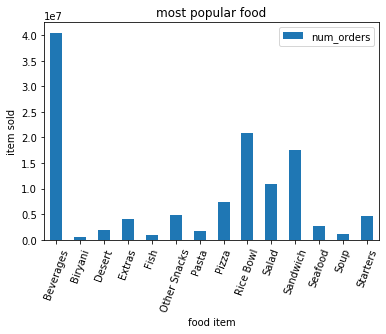

In [12]:
table.plot(kind='bar')
plt.xticks(rotation=70)
plt.xlabel('food item')
plt.ylabel('item sold')
plt.title('most popular food')

In [13]:
df['revenue']=df['num_orders']*df['checkout_price']

In [14]:
table1=pd.pivot_table(data=df,index='week',values='revenue',aggfunc=np.sum)

In [63]:
df['month']=((df['week']//4)+1)

In [64]:
table2=pd.pivot_table(data=df,index='month',values='revenue',aggfunc=np.sum)

In [65]:
table1.head()

,revenue
week,
1,2.185165e+08
2,1.999142e+08
3,1.780359e+08
4,1.961360e+08
5,2.596449e+08


In [66]:
table2.head()

,revenue
month,
1,5.964666e+08
2,8.768886e+08
3,7.744681e+08
4,7.018996e+08
5,7.831555e+08


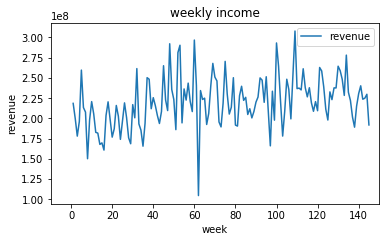

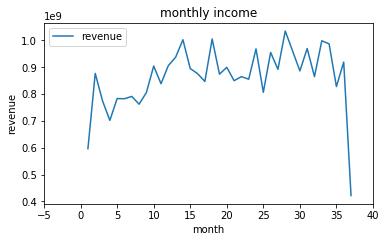

In [67]:
ax=table1.plot()
ax.set_xlim([-10,150])
plt.title('weekly income')
plt.xlabel('week')
plt.ylabel('revenue')
plt.tight_layout(3.0)
ax1=table2.plot()
ax1.set_xlim([-5,40])
plt.title('monthly income')
plt.xlabel('month')
plt.ylabel('revenue')
plt.tight_layout(3.0)

TypeError: 'function' object is not subscriptable